In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = [9.694316117164222, 20.17466650963661, 28.820963579299146, 43.23144536894875, 58.165936682349155, 73.36245274730695, 88.8209535844582, 104.27947441129142, 103.75546488754057, 0, -0.5240295134328004, -14.934511303082363, -29.86900261648277, -44.279484406132354, -59.21399570921476, -74.67250654120697, -90.13102736804018, -103.23146535863071, 62.358072841401714, -69.17032658309535, -102.9694506019143, -28.820963579299146, 87.77293453695654, 40.61135777083066, -93.01311972803371, -99.56333872332897, -81.74674505509407, -52.40175196236209, -9.69433610684616, 97.46725065412072, 76.50654986917587, 49.51963961268662, -40.87338252238801, -18.86464270025952, -7.336253270603471, 31.703055939292717, 23.318763631505583, 11.528369439974075, -81.74674505509407, -67.33626326544449, -51.61573767673584, -21.22272553650221, -95.10918780755999, -101.92142155957167, -96.94325112521086, -88.55896881226472, -74.93451130308237, -61.310053793900046, 14.148457038092166, 36.681226373653494, 50.30567388799484, 65.76419471482807, 96.15720685506166, 92.48908021975994, 100.08737823160284, 82.53275934072032, 71.26637467293969, -3.9301313971771386, -10.480350392472388, -46.899572004250466, -33.799134013659945, -23.0567788593121, -14.934511303082363, 4.454140920927982, -36.68122637365346, -85.93888121414662]
y = [54.20749949595433, 70.28818110201422, 72.36311669740044, 73.40057460106736, 73.91930849991392, 77.80979790022381, 80.92219139927694, 80.1440954980202, 68.99135130191094, 48.50144639669461, -44.092213203511974, -69.2507034102949, -72.36308701532187, -76.77232020850448, -77.55040621573504, -78.58787401342815, -78.58787401342815, -78.58787401342815, -0.25936200241016943, 0.7781057952829296, -74.95674661552847, 25.93658610803969, 30.345829195248488, -15.043213808366792, -38.645512212636255, -60.69161881439224, -16.858787401342802, 12.449573996212566, 42.017297396178144, 51.87320189815792, 12.708945892648929, -9.337170603133233, 18.155607307419935, 33.71758469671183, -59.13542701187877, -20.23053300877994, -26.195958004476037, -36.05185261242964, -78.32851201101795, -76.25357641563176, -75.99421441322157, -71.84436301050148, -78.06915000860776, -67.17576781490871, -49.53889440633531, -29.048979607092797, -8.299702805440097, 7.262254795799401, 61.210372501291175, 72.36311669740044, 72.62247869981063, 76.25360609771032, 79.36598970273728, 40.72046759607483, 61.729106400137724, 21.00864869808908, 5.965424995696095, -51.095086208848784, -63.804022207471576, 15.56194770721336, 22.564850394628746, 29.827095296401936, 37.34871209461153, 51.09510599690119, -75.73485241081138, -22.82419260898655]

7


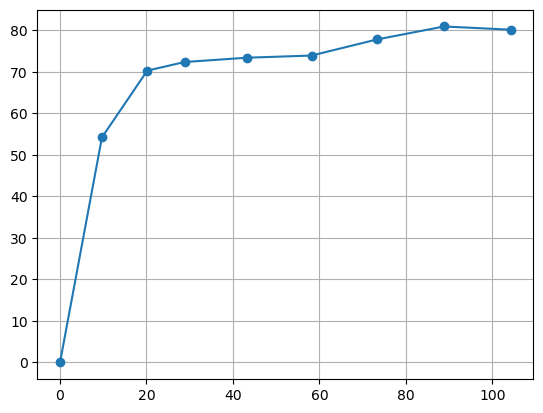

(2, 66)


In [7]:
LoadDisp = np.array([y])
LoadDisp = np.vstack((LoadDisp,np.expand_dims(np.array(x),0)))
for i,disp in enumerate(x):
  if x[i+1]<x[i]:
    break
print(i)
enveloperight = [(load, disp) for count,(disp,load) in enumerate(zip(x,y)) if count<=i ]
# print(enveloperight)
enveloperight.insert(0,[0,0])
enveloperight = np.array(enveloperight)
plt.plot(enveloperight[:,1],enveloperight[:,0], marker = "o")
# plt.plot(enveloperight[:,1],enveloperight[:,0], marker = "o", s = 10)
plt.grid()
plt.show()
# enveloperight[:][1]
print(LoadDisp.shape)
np.savetxt('envelopeRightPark.txt', enveloperight)

7


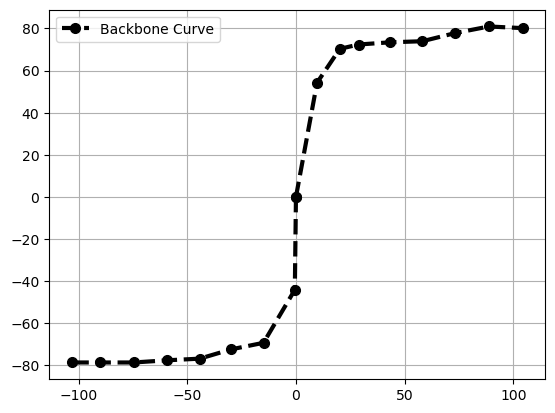

In [4]:
X = np.expand_dims(LoadDisp[0,:],0)  #load
Y = np.expand_dims(LoadDisp[1,:],0)   #disp
# plt.scatter(Y[0,:],X[0,:], marker = 'o', s = 6)

mask = (X<0) & (Y<0)

leftX = X[mask]
leftY = Y[mask]

minDisp = np.min(leftY)
minDispIndex = np.argmin(leftY)
print(minDispIndex)
leftX = leftX[:minDispIndex+1]
leftY = leftY[:minDispIndex+1]
# plt.scatter(leftY,leftX, marker = '+', s = 100)
leftEnvelope = np.vstack((np.expand_dims(leftX,0),np.expand_dims(leftY,0)))
leftEnvelope = np.insert(leftEnvelope,0,0.,axis = 1)
plt.plot(enveloperight[:,1],enveloperight[:,0],'black', marker = "o",markersize = 7, linewidth = 3,ls = "--", label = "Backbone Curve")
plt.plot(leftEnvelope[1,:],leftEnvelope[0,:],'black', marker = 'o',markersize = 7,linewidth = 3,ls = "--",)
plt.grid()
plt.legend()


In [5]:
np.expand_dims(LoadDisp[0,:],0).shape

(1, 66)

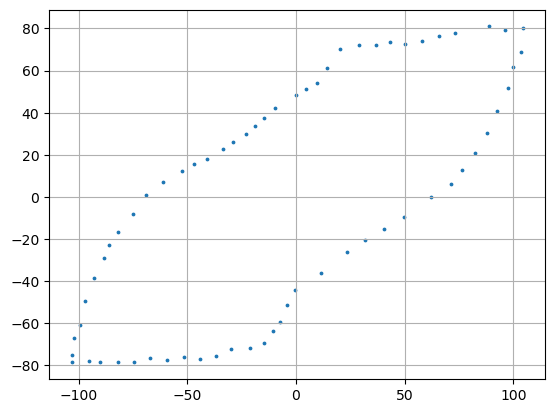

In [6]:
plt.scatter(x,y, marker = "o", s = 3)
# plt.plot(freeEndDisp,loadFactor)
plt.grid()
plt.show()